# Chapter 2: Fundamental Concepts

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

## Exercises

### Problem 4

Let {a_t} be zero-mean white noise. Find the| autocorrelation function for the following two processes:

$$(a) \hspace{0.25cm} Z_t = a_t + \frac{1}{3}a_{t-1} \\
(b) \hspace{0.25cm} Z_t = a_t + 3a_{t-1}$$

In [2]:
def simulate_MA2(T, theta, dist='normal'):
    if dist == 'normal':
        a = np.random.normal(size=T)
    elif dist == 'uniform':
        a = np.random.uniform(low=-1, high=1, size=T)
    
    a_prev = np.roll(a, shift=1)
    a_prev[0] = np.nan
    
    z = np.zeros(shape=(T,))
    
    for t in range(T):
        z[t] = theta[0] * a[t] + theta[1] * a_prev[t]
    
    return pd.Series(z)

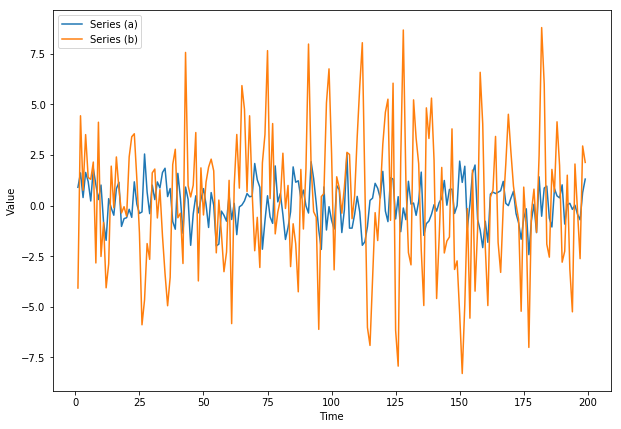

In [3]:
# Simulate both series
z1 = simulate_MA2(T=200, theta=[1, 1/3], dist='normal')
z2 = simulate_MA2(T=200, theta=[1, 3], dist='normal')

plt.figure(figsize=(10, 7))
plt.plot(range(len(z1)), z1, label='Series (a)')
plt.plot(range(len(z2)), z2, label='Series (b)')
plt.xlabel('Time')
plt.ylabel("Value")
plt.legend()

### Autocorrelation Plots

We will use statsmodels to generate the autocorrelation plots for these series.

In [4]:
from statsmodels.graphics.tsaplots import plot_acf

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


As expected, there are only significant autocorrelations between the zero and one time lags, with the single lag autocorrelation being close to the actual value of 0.3. Everything covered by the blue area is presumably insignificant.

NOTE: When using the plot_acf() function inside a notebook, you need to assign the plot to an object otherwise the plot will display twice

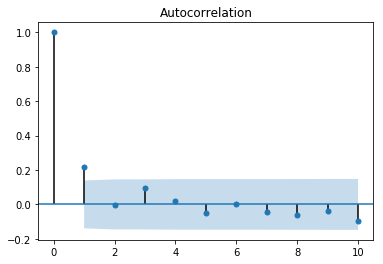

In [5]:
p = plot_acf(z1.dropna(), lags=10)

As expected, we observe a nearly identical (though in reality, actually identical) autocorrelation structure for the second time series.

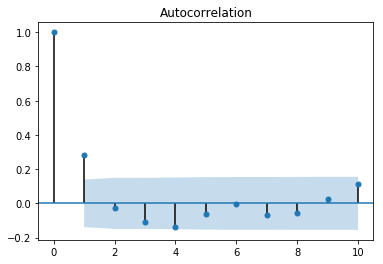

In [6]:
p = plot_acf(z2.dropna(), lags=10)

### Problem 5

Suppose $Z_t = 5 + 2t + X_t$, where $\{X_t\}$ is a zero-mean stationary series with autocovariance function $\gamma_k$. Find (a) the mean function and (b) the autocovariance function for $\{Z_t\}$. I solved this problem in my notebook, but wanted to do osme simulations here.

In [31]:
num_points = 1000

# Simulate a zero-mean stationary series
x = np.random.normal(size=num_points)
t = pd.Series(list(range(num_points)))

# Compute z
z = 5 + 2*t + x

According to the book, the series $Z_t$ and $X_t$ should have the same autocovariance structure. The plots below of the autocorrelation functions, however, are very, very different. I am not sure why this is.

#### Autocorrelation Plot for $\{X_t\}$

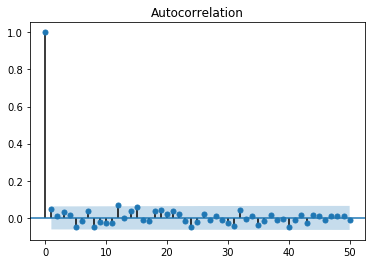

In [32]:
p = plot_acf(x, lags=50)

#### Autocorrelation Plot for $\{Z_t\}$

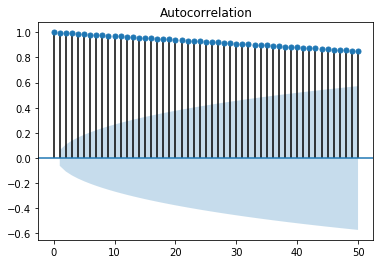

In [45]:
p = plot_acf(z, lags=50)